In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

huihi

In [ ]:
N = 100 #Number of point
theta = np.random.uniform(0,2*np.pi,N)
w1 = np.random.normal(loc=0,scale=1,size=N)
w2 = np.random.normal(loc=0,scale=1,size=N)

x1 = 8*np.cos(theta)+w1
x2 = 8*np.sin(theta)+w2

v1 = np.random.normal(loc=0,scale=1,size=N)
v2 = np.random.normal(loc=0,scale=1,size=N)

X = np.zeros((200,2))
X[0:100,0]=x1
X[0:100,1] =x2
X[100:200,0] =v1
X[100:200,1] =v2

Y = np.ones((200,1))
Y[100:200] = -1


plt.plot(X[0:100,0],X[0:100,1],'.',color='b',label='y = 1')
plt.plot(X[100:200,0],X[100:200,1],'.',color='r',label='y = -1')
plt.legend()





In [6]:
reg = 1e-6
K= (1+X.dot(X.T))**2
a = (np.linalg.inv(K+reg*np.eye(2*N))).dot(Y)
result = K.dot(a)
result = (result>0)*2-1

print("Train accuracy: {0}".format(metrics.accuracy_score(Y, result)))


Train accuracy: 0.985


(200, 200)
(200, 200)


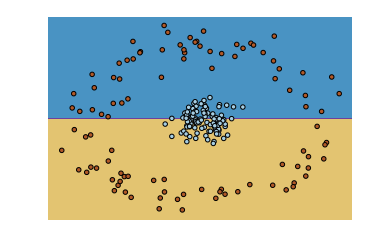

In [8]:
# X - some data in 2dimensional np.array

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max,(x_max-x_min)/200),
                     np.arange(y_min, y_max,(y_max-y_min)/200))
print(xx.shape)
# here "model" is your model's prediction (classification) function
Z = np.ones((2*N,2*N))
Z[100:200] = -1

# Put the result into a color plot
#Z = Z.reshape(xx.shape)
print(Z.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis('off')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

In [61]:
gamma = 10
reg2 = 1e-4
K2 = np.zeros((2*N,2*N))
for i in range(2*N):
 Zi = np.repeat([X[i]],2*N,axis=0)
 XZ= X-Zi
 XZ=XZ[:,0]**2+XZ[:,1]**2
 K2[i]=np.exp(-gamma*XZ)
a2 = (np.linalg.inv(K2+reg2*np.eye(2*N))).dot(Y)
result2 = K2.dot(a2)
result2 = (result2>0)*2-1
print("Train accuracy: {0}".format(metrics.accuracy_score(Y, result2)))


Train accuracy: 1.0
